In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [4]:
url = 'https://raw.githubusercontent.com/ovlathkar/Clustering/refs/heads/main/crime_data.csv'
crime_df = pd.read_csv(url)
crime_df.rename(columns={"Unnamed: 0": "State"}, inplace=True)
crime_df.set_index("State", inplace=True)
crime_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


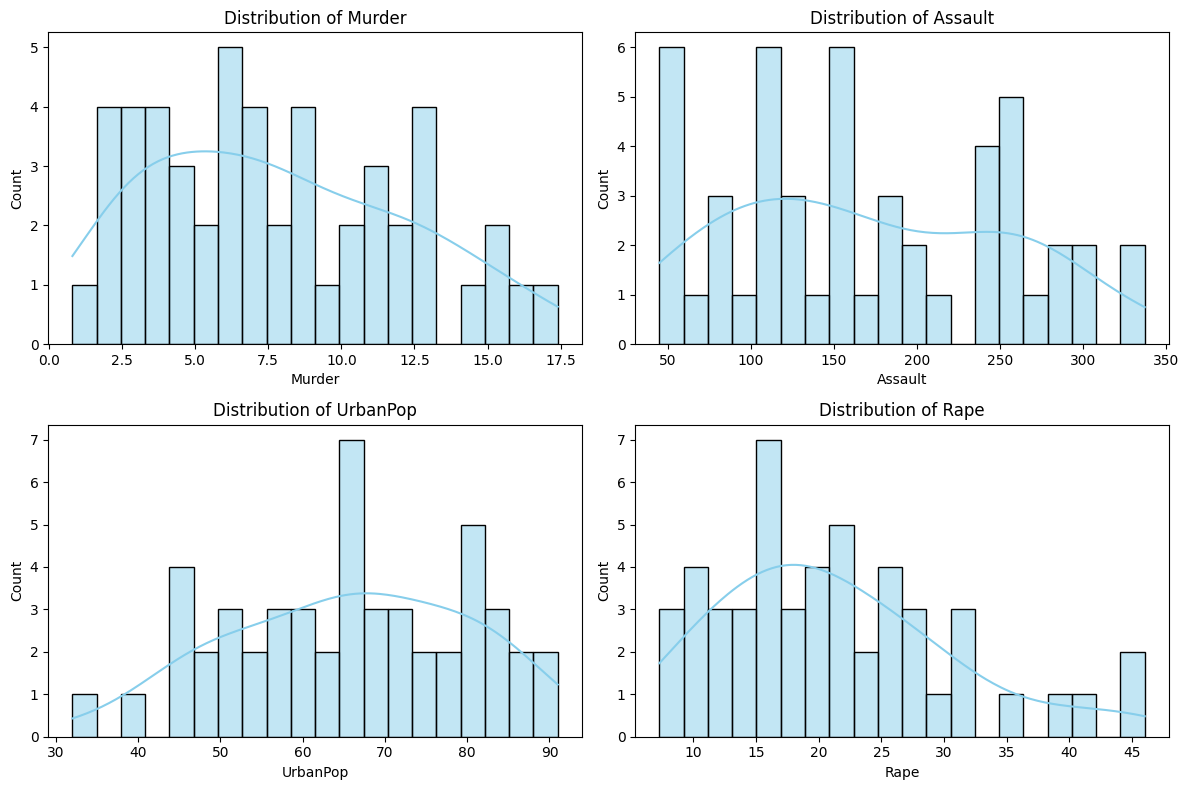

In [3]:
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(crime_df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


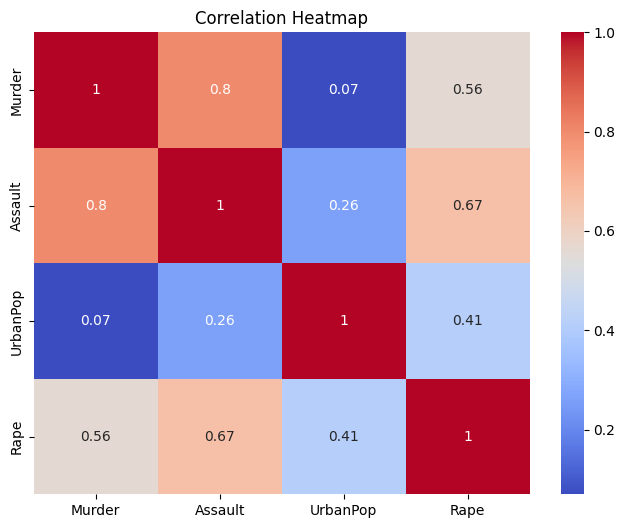

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(crime_df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_df[features])

In [7]:
linkage_matrix = linkage(crime_scaled, method='ward')
linkage_matrix

array([[14.        , 28.        ,  0.2079438 ,  2.        ],
       [12.        , 31.        ,  0.35377437,  2.        ],
       [13.        , 15.        ,  0.43312429,  2.        ],
       [22.        , 48.        ,  0.49909939,  2.        ],
       [19.        , 30.        ,  0.54082482,  2.        ],
       [35.        , 52.        ,  0.55914837,  3.        ],
       [36.        , 46.        ,  0.59956023,  2.        ],
       [18.        , 50.        ,  0.66258522,  3.        ],
       [45.        , 49.        ,  0.71097658,  2.        ],
       [40.        , 47.        ,  0.71809843,  2.        ],
       [25.        , 26.        ,  0.74649625,  2.        ],
       [ 0.        , 17.        ,  0.78006247,  2.        ],
       [34.        , 37.        ,  0.78602982,  2.        ],
       [23.        , 39.        ,  0.79455301,  2.        ],
       [20.        , 29.        ,  0.80586349,  2.        ],
       [11.        , 60.        ,  0.81584299,  3.        ],
       [55.        , 62.

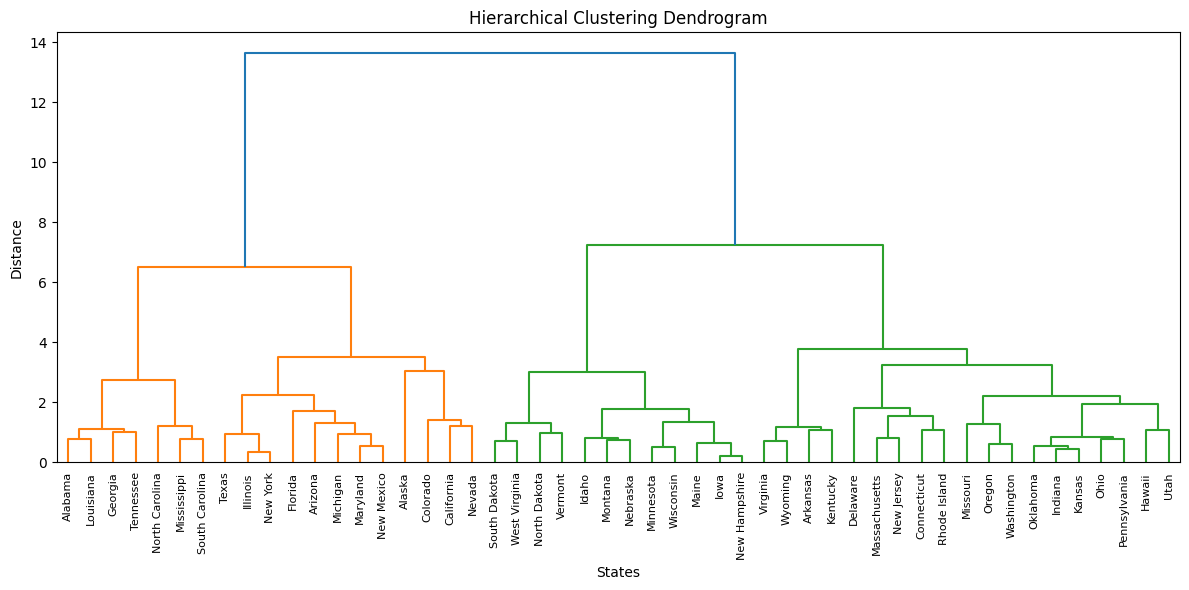

In [8]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=crime_df.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("States")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [10]:
crime_df['Hier_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')
crime_df['Hier_Cluster']

,Hier_Cluster
State,
Alabama,1
Alaska,2
Arizona,2
Arkansas,4
California,2
Colorado,2
Connecticut,4
Delaware,4
Florida,2


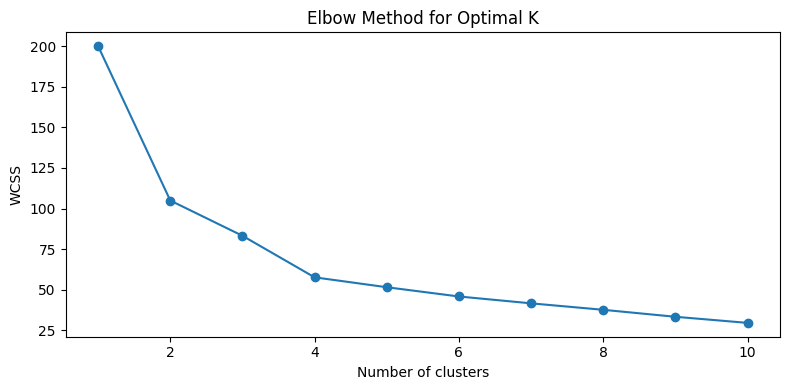

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.tight_layout()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
crime_df['KMeans_Cluster'] = kmeans.fit_predict(crime_scaled)
crime_df['KMeans_Cluster']

,KMeans_Cluster
State,
Alabama,1
Alaska,2
Arizona,2
Arkansas,1
California,2
Colorado,2
Connecticut,3
Delaware,3
Florida,2


In [14]:
print("=== Hierarchical Clustering Group Means ===")
print(crime_df.groupby('Hier_Cluster')[features].mean())

print("\n=== KMeans Clustering Group Means ===")
print(crime_df.groupby('KMeans_Cluster')[features].mean())

=== Hierarchical Clustering Group Means ===
                 Murder     Assault   UrbanPop       Rape
Hier_Cluster                                             
1             14.671429  251.285714  54.285714  21.685714
2             10.966667  264.000000  76.500000  33.608333
3              3.091667   76.000000  52.083333  11.833333
4              6.210526  142.052632  71.263158  19.184211

=== KMeans Clustering Group Means ===
                   Murder     Assault   UrbanPop       Rape
KMeans_Cluster                                             
0                3.600000   78.538462  52.076923  12.176923
1               13.937500  243.625000  53.750000  21.412500
2               10.966667  264.000000  76.500000  33.608333
3                5.852941  141.176471  73.647059  19.335294
